In [ ]:
import pandas as pd

from keras.layers import Dense
from keras.models import Sequential, load_model
from keras.utils import to_categorical, plot_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from livelossplot import PlotLossesKeras

### Data preprocessing

In [ ]:
df = pd.read_csv('data/sonar.csv', header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
df.shape

(208, 61)

In [ ]:
dataset = df.values
x = dataset[:, 0:60].astype(float)
y = dataset[:, 60]

In [ ]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

### Create model

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, encoded_y, test_size=0.20)

#### Ver. 1

In [ ]:
model = Sequential()

model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

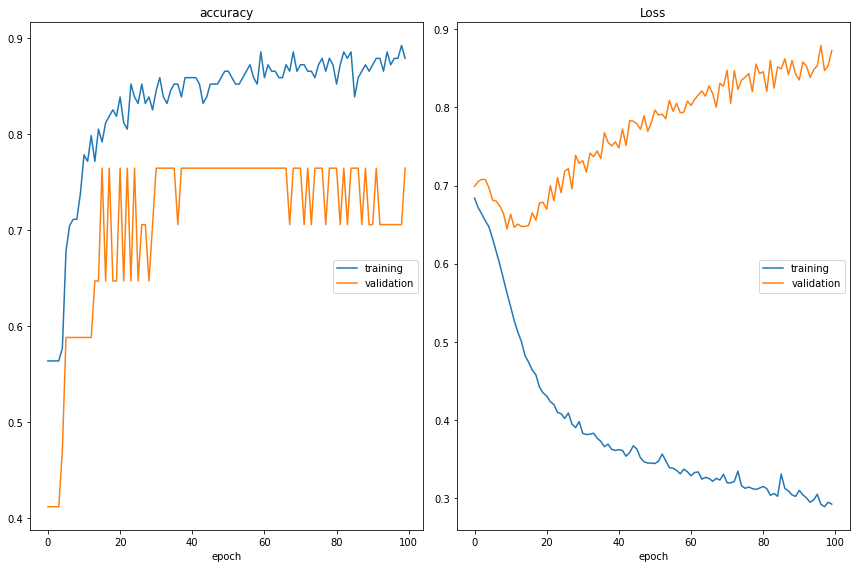

accuracy
	training         	 (min:    0.564, max:    0.893, cur:    0.879)
	validation       	 (min:    0.412, max:    0.765, cur:    0.765)
Loss
	training         	 (min:    0.289, max:    0.684, cur:    0.292)
	validation       	 (min:    0.644, max:    0.879, cur:    0.873)


In [ ]:
model.fit(train_x, train_y, epochs=100, batch_size=10, validation_split=0.1, callbacks=[PlotLossesKeras()])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                3660      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 61        
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

2/2 [==============================] - 0s 4ms/step - loss: 0.5497 - accuracy: 0.8095
Final test set loss: 0.549721
Final test set accuracy: 0.809524


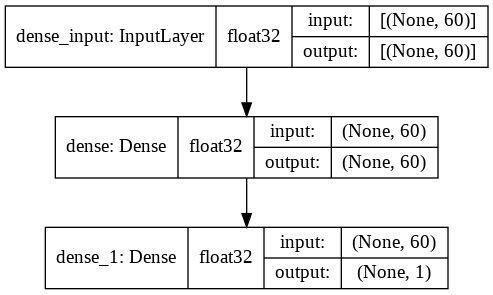

In [ ]:
plot_model(model, show_dtype=True, show_layer_names=True, show_shapes=True)

In [ ]:
model.save('model-1.h5')

#### Ver. 2 (input units = 30)

In [ ]:
model = Sequential()

model.add(Dense(30, input_dim=60, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

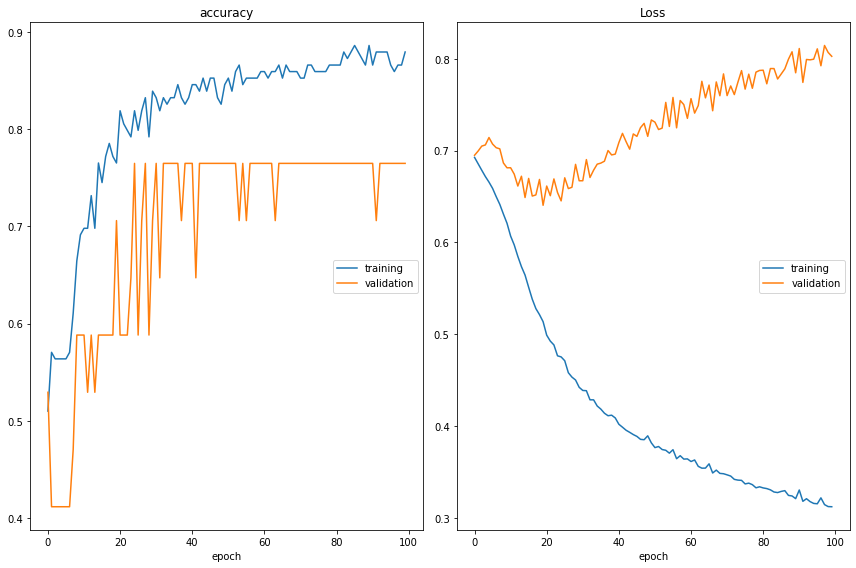

accuracy
	training         	 (min:    0.510, max:    0.886, cur:    0.879)
	validation       	 (min:    0.412, max:    0.765, cur:    0.765)
Loss
	training         	 (min:    0.312, max:    0.693, cur:    0.312)
	validation       	 (min:    0.641, max:    0.815, cur:    0.803)


In [ ]:
model.fit(train_x, train_y, epochs=100, batch_size=10, validation_split=0.1, callbacks=[PlotLossesKeras()])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 1,861
Trainable params: 1,861
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

2/2 [==============================] - 0s 5ms/step - loss: 0.4900 - accuracy: 0.8333
Final test set loss: 0.489967
Final test set accuracy: 0.833333


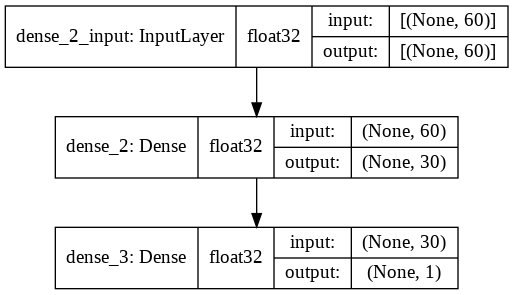

In [ ]:
plot_model(model, show_dtype=True, show_layer_names=True, show_shapes=True)

In [ ]:
model.save('model-2.h5')

#### Ver. 3

In [ ]:
model = Sequential()

model.add(Dense(15, input_dim=60, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

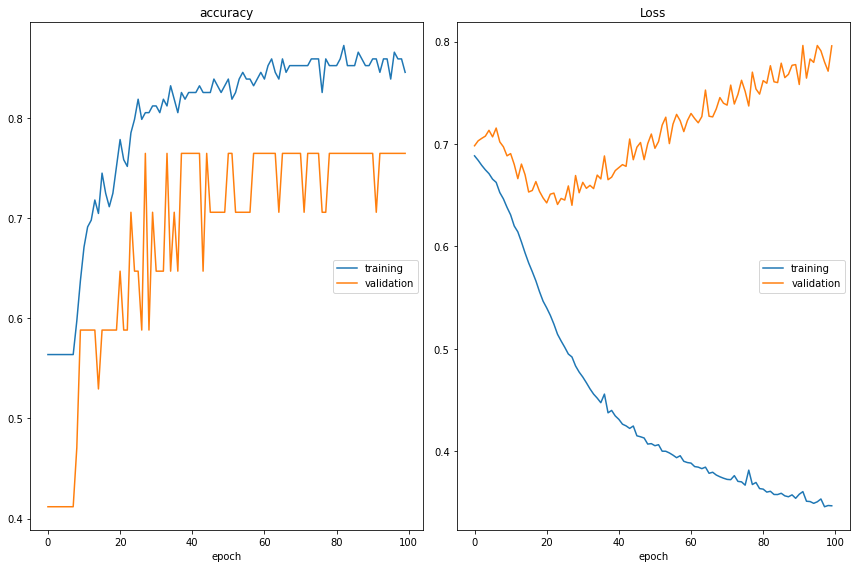

accuracy
	training         	 (min:    0.564, max:    0.872, cur:    0.846)
	validation       	 (min:    0.412, max:    0.765, cur:    0.765)
Loss
	training         	 (min:    0.346, max:    0.688, cur:    0.347)
	validation       	 (min:    0.640, max:    0.796, cur:    0.796)


In [ ]:
model.fit(train_x, train_y, epochs=100, batch_size=10, validation_split=0.1, callbacks=[PlotLossesKeras()])

In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 15)                915       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 16        
Total params: 931
Trainable params: 931
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

2/2 [==============================] - 0s 4ms/step - loss: 0.5066 - accuracy: 0.8095
Final test set loss: 0.506559
Final test set accuracy: 0.809524


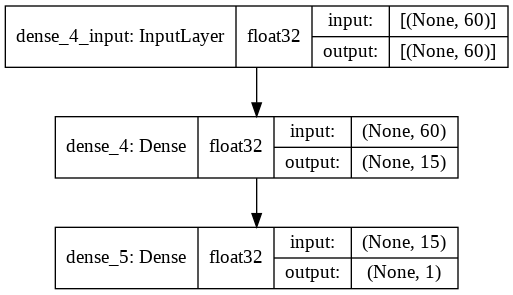

In [ ]:
plot_model(model, show_dtype=True, show_layer_names=True, show_shapes=True)

In [ ]:
model.save('model-3.h5')

#### Ver. 4 (epochs=50)

In [ ]:
model = Sequential()

model.add(Dense(15, input_dim=60, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

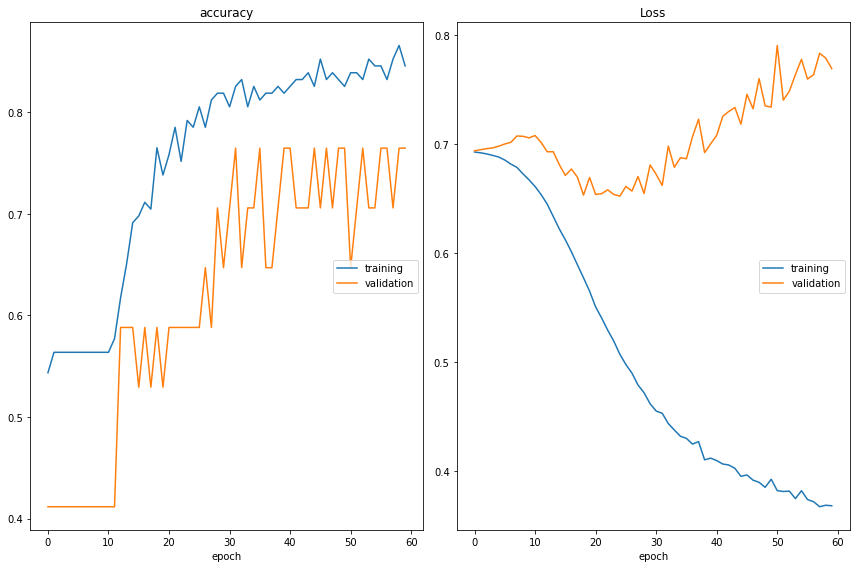

accuracy
	training         	 (min:    0.544, max:    0.866, cur:    0.846)
	validation       	 (min:    0.412, max:    0.765, cur:    0.765)
Loss
	training         	 (min:    0.367, max:    0.693, cur:    0.368)
	validation       	 (min:    0.652, max:    0.791, cur:    0.769)


In [ ]:
model.fit(train_x, train_y, epochs=100, batch_size=10, validation_split=0.1, callbacks=[PlotLossesKeras()])

In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 15)                915       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 1,086
Trainable params: 1,086
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

2/2 [==============================] - 0s 3ms/step - loss: 0.4832 - accuracy: 0.8333
Final test set loss: 0.483198
Final test set accuracy: 0.833333


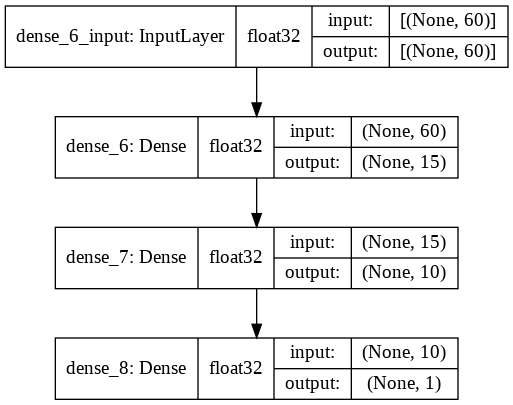

In [ ]:
plot_model(model, show_dtype=True, show_layer_names=True, show_shapes=True)

In [ ]:
model.save('model-4.h5')

#### Ver. 5

In [ ]:
model = Sequential()

model.add(Dense(30, input_dim=60, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

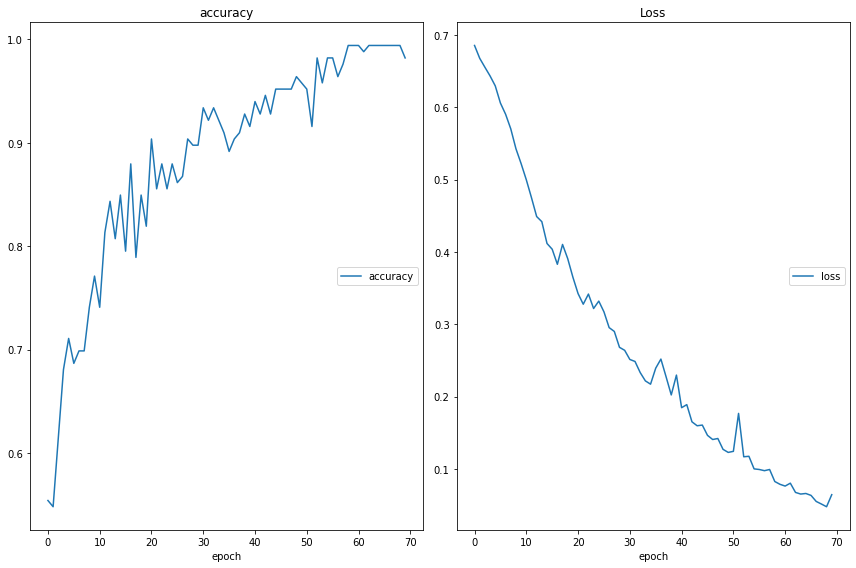

accuracy
	accuracy         	 (min:    0.548, max:    0.994, cur:    0.982)
Loss
	loss             	 (min:    0.048, max:    0.686, cur:    0.064)


In [ ]:
model.fit(train_x, train_y, epochs=70, callbacks=[PlotLossesKeras()])

In [ ]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                610       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 671
Trainable params: 671
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

2/2 [==============================] - 0s 5ms/step - loss: 0.3105 - accuracy: 0.8095
Final test set loss: 0.310514
Final test set accuracy: 0.809524


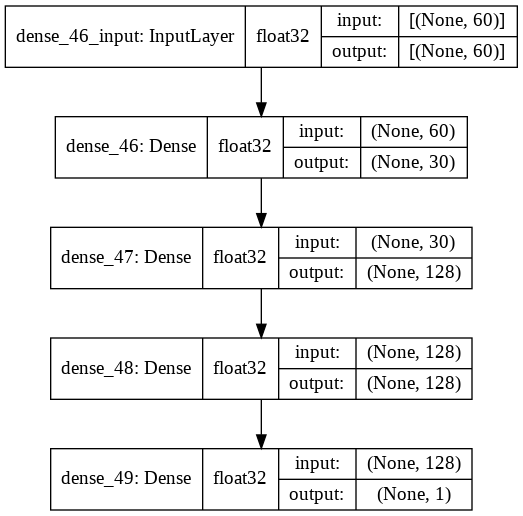

In [ ]:
plot_model(model, show_dtype=True, show_layer_names=True, show_shapes=True)

In [ ]:
model.save('model-5.h5')